In [16]:
#tidy this up
from sympy import Symbol, init_printing, sin, diff, simplify, trigsimp, expand_trig, Function, Derivative
from sympy import MutableDenseNDimArray
from sympy.matrices import *

This line just sets up pretty printing for later.

In [2]:
init_printing()

These are the most commently used coordinate symbols. This should be extended.

In [15]:
t = Symbol("t")
r = Symbol("r")
theta = Symbol("theta")
phi = Symbol("phi")
lamda = Symbol("lamda") #note the spelling!

Here is where the heavy lifting is done. Write a metric class which contains the names of the coordinates, a convenience variable storing the number of coordinates, and an array with the metric elements. 

There are convenience functions to return the dual, derivatives of elements, connection coefficients, and so on.

It might make sense to tabulate and store the connections once on instantiation.

In [21]:
class Metric():
    def __init__(self,coordinates):
        #initially set up with 1's on diagonal
        self.coordinates = coordinates
        self.dimension = len(coordinates)
        self.array = MutableDenseNDimArray([0] * self.dimension * self.dimension, [self.dimension, self.dimension])
        for i in range(self.dimension):
            self.array[i,i]=1
            
    def rank(self):
        return self.array.rank()
    
    def setDiagonal(self, diag):
        if len(diag) == self.dimension:
            for i in range(self.dimension):
                self.array[i,i] = diag[i]
        else:
            print ('Incorrect number of elements')
        
    def inverse(self):
        return self.array.tomatrix().inv() 
    
    def d(self, i, j, k):
        #for convenience - derivative wrt k of i,j'th element
        return diff(self.array[i,j], self.coordinates[k])
    
    def connection(self, m, i, j):
        #indices to match MathWorld
        sum  = 0
        #cache the dual metric - maybe this should be done on instantiation?
        dual = self.inverse()
        for k in range(self.dimension):
            sum += dual[k, m] * (self.d(i,k,j)+ self.d(j,k,i) - self.d(i,j,k))
        return simplify(sum / 2)
    
    def riemann(self, i, j, k, l):
        sum = 0
        sum += diff (self.connection(i,j,l), self.coordinates[k])
        sum -= diff (self.connection(i,j,k), self.coordinates[l])
        for m in range(self.dimension):
            sum += self.connection(m,j,l)*self.connection(i,m,k)
            sum -= self.connection(m,j,k)*self.connection(i,m,l)
        return trigsimp(expand_trig(simplify(sum)))
    
    def ricci(self, i, j):
        sum = 0
        for m in range(self.dimension):
            print (self.riemann(m, i, j, m))
            sum += self.riemann(m, i, j, m)
        return sum
    
    def ricci_scalar(self):
        sum = 0
        dual = self.inverse()
        for m in range(self.dimension):
            for n in range(self.dimension):
                sum += dual[m, n] * self.ricci (m, n)
        return trigsimp(expand_trig(simplify(sum)))
        
    def geodesicEquation(self, i):
        myEquation = 0
        if i in range(self.dimension):
            myEquation += Derivative(self.coordinates[i], lamda, lamda)
        return myEquation
         

Set up plane polars

In [22]:
myMetric = Metric([r, theta])

In [23]:
myMetric.setDiagonal([1,r**2])

Set up spherical polars - watch the convention here

In [7]:
myMetric = Metric([r, theta, phi])

In [8]:
myMetric.setDiagonal([1, (r * sin(phi))**2,r**2])

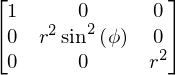

In [9]:
myMetric.array

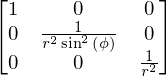

In [10]:
myMetric.inverse()

Choose a connection coefficient at random

In [13]:
myMetric.connection(0,1,1)

In [14]:
myMetric.riemann(0,0,0,1)

adding  0
subtracting  0
adding  0
subtracting  0
adding  0
subtracting  0
adding  0
subtracting  0


surface of a sphere

In [159]:
myMetric = Metric([theta, phi])

In [160]:
myMetric.setDiagonal([r**2, (r * sin(theta))**2])

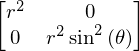

In [101]:
myMetric.array

In [151]:
myMetric.connection(0,1,0)

In [165]:
myMetric.riemann(0,1,0,1)

adding  -cos(2*theta)
subtracting  0
adding  0
subtracting  0
adding  0
subtracting  -sin(2*theta)/(2*tan(theta))


In [161]:
myMetric.riemann(1,0,0,1)

adding  (-tan(theta)**2 - 1)/tan(theta)**2
subtracting  0
adding  0
subtracting  0
adding  tan(theta)**(-2)
subtracting  0


In [162]:
myMetric.ricci(0,0)

adding  0
subtracting  0
adding  0
subtracting  0
adding  0
subtracting  0
0
adding  0
subtracting  0
adding  0
subtracting  0
adding  0
subtracting  0
adding  (-tan(theta)**2 - 1)/tan(theta)**2
subtracting  0
adding  0
subtracting  0
adding  tan(theta)**(-2)
subtracting  0
-1
adding  (-tan(theta)**2 - 1)/tan(theta)**2
subtracting  0
adding  0
subtracting  0
adding  tan(theta)**(-2)
subtracting  0


In [131]:
myMetric.ricci(0,1)

In [132]:
myMetric.ricci(1,0)

In [163]:
myMetric.ricci(1, 1)

adding  0
subtracting  -cos(2*theta)
adding  0
subtracting  0
adding  -sin(2*theta)/(2*tan(theta))
subtracting  0
-sin(theta)**2
adding  0
subtracting  -cos(2*theta)
adding  0
subtracting  0
adding  -sin(2*theta)/(2*tan(theta))
subtracting  0
adding  0
subtracting  0
adding  -sin(2*theta)/(2*tan(theta))
subtracting  -sin(2*theta)/(2*tan(theta))
adding  0
subtracting  0
0
adding  0
subtracting  0
adding  -sin(2*theta)/(2*tan(theta))
subtracting  -sin(2*theta)/(2*tan(theta))
adding  0
subtracting  0


In [164]:
myMetric.ricci_scalar()

adding  0
subtracting  0
adding  0
subtracting  0
adding  0
subtracting  0
0
adding  0
subtracting  0
adding  0
subtracting  0
adding  0
subtracting  0
adding  (-tan(theta)**2 - 1)/tan(theta)**2
subtracting  0
adding  0
subtracting  0
adding  tan(theta)**(-2)
subtracting  0
-1
adding  (-tan(theta)**2 - 1)/tan(theta)**2
subtracting  0
adding  0
subtracting  0
adding  tan(theta)**(-2)
subtracting  0
adding  0
subtracting  0
adding  0
subtracting  0
adding  0
subtracting  0
0
adding  0
subtracting  0
adding  0
subtracting  0
adding  0
subtracting  0
adding  0
subtracting  0
adding  0
subtracting  0
adding  0
subtracting  0
0
adding  0
subtracting  0
adding  0
subtracting  0
adding  0
subtracting  0
adding  0
subtracting  0
adding  0
subtracting  0
adding  0
subtracting  0
0
adding  0
subtracting  0
adding  0
subtracting  0
adding  0
subtracting  0
adding  0
subtracting  0
adding  0
subtracting  0
adding  0
subtracting  0
0
adding  0
subtracting  0
adding  0
subtracting  0
adding  0
subtra

In [167]:
sum = 0
for i in range(0,2):
    sum += myMetric.array[i]

0
1


In [24]:
print (myMetric.geodesicEquation(0))

Derivative(r, lamda, lamda)
